# ДЗ №2. Определить настроение комментария в датасэте [Twitter Sentiment Analysis](https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech/data)

## Ссылки на материалы, которые я разворовывал, разбирал и изучал

[Учебник ШАД, он тут будет всегда](https://education.yandex.ru/handbook/ml)

[Основы Natural Language Processing для текста](https://habr.com/ru/companies/Voximplant/articles/446738/)

[Леция Радослава Нейчева. 1. Intro to NLP. Word embeddings. Чтобы начать понимать что к чему и что от нас хотят.](https://www.youtube.com/watch?v=aZ5se_SW81c&t=286s)

[TF-IDF. Лекция Радослава.](https://youtu.be/aZ5se_SW81c?t=1673)

[Эмбендинги. Лекция Радослава.](https://youtu.be/aZ5se_SW81c?t=1966)


- Ноутбуки с Кагла:

[Руководство для начинающих работать с текстовыми данными](https://www.kaggle.com/code/prashant111/a-beginners-guide-to-dealing-with-text-data)

[А вот тут интересный ноутбук с применением PyTorch](https://www.kaggle.com/code/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk#notebook-container)

[Использование наивного байеса](https://www.kaggle.com/code/karansehgal13/twitter-sentiment-analysis-using-naive-bayes-nlp)

[Разобрано много различных вариантов](https://www.kaggle.com/code/eisgandar/twitter-sentiment-analysis-hatred-speech)

- Ноутбуки от гусей с каких то курсов видимо с использованием торча

[№1, не абы какой, но все же](https://www.kaggle.com/code/gregavsyannikov/hw-6-pytorch)

[№2, сомнительный, ну ОКЭЙ](https://www.kaggle.com/code/marinademina/pytorch-hw6)

[№3 с нейронками: CNN, LSTM, GRU](https://www.kaggle.com/code/pyatachok/pytorch-homewrok-7)

- [Random Forest, SVM, Naive Bayes + DL ROS TensorFloW](https://www.kaggle.com/code/abdusalam7474/sentiment-analyis-ml-dl-dbert)

- Софтвейринжинерс фром Индиа, куда без них:

[Индус и Логистическая регрессия. Соревнование здесь не наше, но задача та же самая](https://www.youtube.com/watch?v=4YGkfAd2iXM)

[Еще видео с кодом Логистической регрессии и LinearSVC. Pfizer Vaccine Tweets](https://www.youtube.com/watch?v=ng6L_wvREB4)

- Прочие статьи:

[Курс NLP Course | For You Лены Войта. Текстовая классификация](https://lena-voita.github.io/nlp_course/text_classification.html)



## Ссылки на документации различных моделей

- Linear SVC:

[Документация Linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

- Support Vector Machines — SVM - Метод опорных векторов

[Документация SVM](https://scikit-learn.ru/1-4-support-vector-machines/)

- Наивные Методы Байеса

[Документация: Наивные методы Байеса](https://scikit-learn.org/stable/modules/naive_bayes.html)


[Документация: Наивные методы Байеса на русском](https://scikit-learn.ru/1-9-naive-bayes/)

- Random Forest

[Документация SKlearnRandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## Импорт необходимых утилит и датасэта

### Импорт утилит

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Импорт датасэта Вариант №1 (Загрузка с Кагла)

In [2]:
# Загружаю kaggle.json в google collab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taliyivanov","key":"c0a7d639ade0b89a760324df3b08c1cf"}'}

In [3]:
# устанавливаем библиотеку kaggle
!pip install kaggle

In [4]:
#  cоздаем каталог с именем “.kaggle”
! mkdir ~/.kaggle

In [5]:
# скопируем файл “kaggle.json” в созданный каталог
! cp kaggle.json ~/.kaggle/

In [6]:
# Назначим необходимое разрешение для этого файла
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# загружаем датасет
! kaggle datasets download arkhoshghalb/twitter-sentiment-analysis-hatred-speech

Dataset URL: https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech
License(s): unknown
  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 137MB/s]


In [8]:
! unzip twitter-sentiment-analysis-hatred-speech

Archive:  twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


## Первое знакомство с данными

### Train

In [2]:
# считаем датасет
df_train = pd.read_csv('train.csv', sep = ',')

In [3]:
# первые 5 строк датасета
df_train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


0 = Позитивный комментарий

1 = Негативный комментарий

In [4]:
# последние 5 строк датасета
df_train.tail(5)

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# количество строк/столбцов
df_train.shape

(31962, 3)

In [7]:
# проверка на пропуски
df_train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
# вдруг в label есть значение 3
df_train.apply(np.max)

id                                                   31962
label                                                    1
tweet    ó¾­© duchess ó¾  roxie sinesh  ó¾­© â½ #sup...
dtype: object

Пока что все просто прекрасно, пропуски отсутствуют, дубликаты отсутствуют. Каких то "лишних" значений в графе label нет.
Не вижу смысла в наличии графы ID. Поэтому облегим датасет и дропне данную колонку.
Двигаемся дальше.

In [14]:
df_train = df_train.drop('id', axis = 1)
df_train.head(5)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


### Test

На всякий случай заглянем в тестовую, ну мало ли чот не так)

In [8]:
# считаем датасет
df_test = pd.read_csv('test.csv', sep = ',')

In [9]:
# первые 5 строк
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
# последние 5 строк
df_test.tail(5)

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [11]:
df_test.shape

(17197, 2)

## EDA - Основное исследование данных

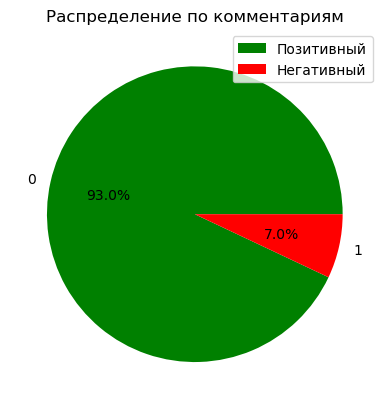

In [14]:
# взглянем на распределение настроений пользователей в коментариях
label_count = df_train['label'].value_counts()

colors = ['green', 'red']

plt.pie(label_count, labels=label_count.index, colors=colors, autopct='%1.1f%%')

grade = ['Позитивный', 'Негативный']
plt.legend(grade, loc="best")

plt.title('Распределение по комментариям')
plt.show()

Очевидно, что позитивных коментариев у нас гораздо больше, чем негативных. Необходимо делать балансировку классов.

Создадим дополнительный столбец длинн коментариев.

In [15]:
# создаем список с длинами коментариев
length = list()
for i in range(len(df_train)):
  length.append(len(df_train.iloc[i,1]))

In [16]:
df_train['length'] = length
df_train.head(5)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


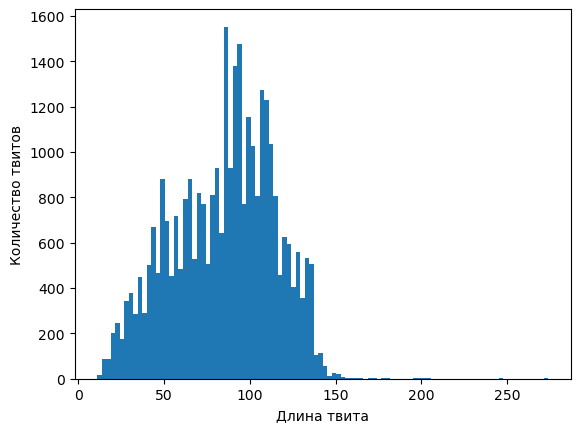

In [17]:
# распределение длинн коментариев
plt.hist(df_train['length'], bins = 100)
plt.xlabel('Длина твита')
plt.ylabel('Количество твитов')
plt.show()

In [18]:
# самый короткий твит
df_train[df_train['length'] == min(df_train['length'])]['tweet'].iloc[0]

'i love you '

In [19]:
# самый длинный твит
df_train[df_train['length'] == max(df_train['length'])]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [20]:
# выделим позитивные твиты
positive = df_train[df_train['label'] == 0]

In [21]:
positive.describe()

,label,length
count,29720.0,29720.000000
mean,0.0,84.328634
std,0.0,29.566484
min,0.0,11.000000
25%,0.0,62.000000
50%,0.0,88.000000
75%,0.0,107.000000
max,0.0,274.000000


In [22]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [23]:
# выделим негативные твиты
negative = df_train[df_train['label'] == 1]

In [24]:
negative.describe()

,label,length
count,2242.0,2242.000000
mean,1.0,90.187779
std,0.0,27.375502
min,1.0,12.000000
25%,1.0,69.000000
50%,1.0,96.000000
75%,1.0,111.000000
max,1.0,152.000000


Очень интересно выходит. Как правило негативные коментарии короче позитивных. Если посмотреть на средние показатели позицтивных и негативных. То выходит, что в среднем негативные коментарии на 10% длиннее позитивных)

In [25]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


Украл у некоего товарища прикольный способ визуализации слов.

Было бы круто, если бы нам такое показывал на занятиях, как то радостнее информация воспринимается)

[Ссылка на гитхаб wordcloud](https://github.com/amueller/word_cloud)

In [26]:
! pip install wordcloud

In [27]:
# импортируем
from wordcloud import WordCloud

In [28]:
sentences = positive['tweet'].tolist()

In [29]:
combined_sentences = " ".join(sentences)

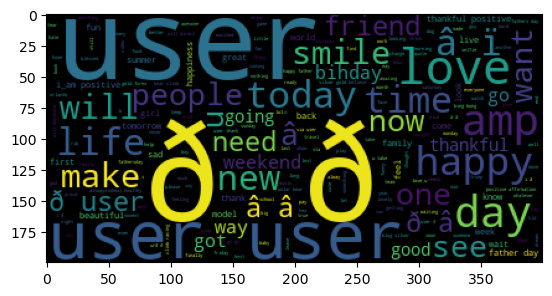

In [30]:
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

In [31]:
negative_sentences = negative['tweet'].tolist()

In [32]:
combined_negative_sentences = " ".join(negative_sentences)

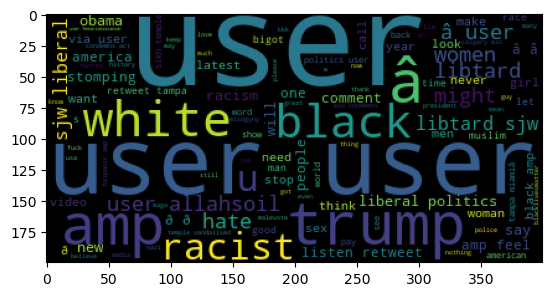

In [33]:
plt.imshow(WordCloud().generate(combined_negative_sentences))
plt.show()

Бедные расисты, трамп и обама с юзерами :D

# Гайд для новичков по работе с Текстовыми данными

Прежде чем я отправлюсь заниматься предобработкой данных, я бы хотел изучить датасэт [A Beginners Guide to dealing with Text Data](https://www.kaggle.com/code/prashant111/a-beginners-guide-to-dealing-with-text-data), в котором рассказано о методах работы с текстовыми данными для новичков.

Данный раздел можно не проверять, он больше для меня =)

## Подсчет количества слов

- Одним из основных требований NLP-анализа является подсчет количества слов в каждом твите. Идея заключается в том, что *негативные настроения содержат меньше слов, чем позитивные*.

- Мы можем выполнить вышеуказанную задачу (подсчитать количество слов), используя функцию разделения в Python следующим образом:

In [34]:
#создаю функцию, которая будет считать слова и добавлять столбик в данные
def num_of_words(df):
  # создание новой колонки с подсчетом слов
  df['word_count'] = df['tweet'].apply(lambda x : len(str(x).split(' ')))
  print(df[['tweet', 'word_count']].head(10))

In [35]:
num_of_words(df_train)

                                               tweet  word_count
0   @user when a father is dysfunctional and is s...          21
1  @user @user thanks for #lyft credit i can't us...          22
2                                bihday your majesty           5
3  #model   i love u take with u all the time in ...          17
4             factsguide: society now    #motivation           8
5  [2/2] huge fan fare and big talking before the...          21
6   @user camping tomorrow @user @user @user @use...          12
7  the next school year is the year for exams.ð...          23
8  we won!!! love the land!!! #allin #cavs #champ...          13
9   @user @user welcome here !  i'm   it's so #gr...          15


In [36]:
num_of_words(df_test)

                                               tweet  word_count
0  #studiolife #aislife #requires #passion #dedic...          12
1   @user #white #supremacists want everyone to s...          20
2  safe ways to heal your #acne!!    #altwaystohe...          15
3  is the hp and the cursed child book up for res...          24
4    3rd #bihday to my amazing, hilarious #nephew...          18
5                        choose to be   :) #momtips            8
6  something inside me dies ð¦ð¿â¨  eyes nes...          15
7  #finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...           5
8   @user @user @user i will never understand why...          23
9  #delicious   #food #lovelife #capetown mannaep...           9


Так же, мы можем посчитать количество символов в каждом твите. Я делал это ранее, в EDA. Поэтому посторять не буду.

Единственное добавлю, что в данном способе учитывается так же количество пробелов. В прочем, их можно будет удалить.

## Средняя длина слова

- Теперь важно количество слов и количество символов. Но есть еще одна важная особенность — средняя длина слова каждого твита. Эта функция может помочь нам улучшить нашу модель.

- Мы можем выполнить вышеуказанную задачу, просто взяв сумму длин всех слов и разделив ее на общую длину твита.

In [37]:
# функция, которую мы будет класть в лямбду
# считает среднюю длину слова твита
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [38]:
# функция, которая добавит в наша датасет среднюю длину слова в твите
def avg_word_length(df):
  df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
  print(df[['tweet', 'avg_word']].head())

In [39]:
avg_word_length(df_train)

                                               tweet  avg_word
0   @user when a father is dysfunctional and is s...  4.555556
1  @user @user thanks for #lyft credit i can't us...  5.315789
2                                bihday your majesty  5.666667
3  #model   i love u take with u all the time in ...  4.928571
4             factsguide: society now    #motivation  8.000000


In [40]:
avg_word_length(df_test)

                                               tweet  avg_word
0  #studiolife #aislife #requires #passion #dedic...  8.777778
1   @user #white #supremacists want everyone to s...  5.125000
2  safe ways to heal your #acne!!    #altwaystohe...  6.333333
3  is the hp and the cursed child book up for res...  5.409091
4    3rd #bihday to my amazing, hilarious #nephew...  5.066667


## Количество стоп-слов

- Обычно при решении любой задачи NLP первое, что мы делаем, — это удаляем стоп-слова. Но что такое стоп-слова?

- Cтоп-слова — это часто используемые слова, такие как a, an, которые отфильтровываются до или после обработки данных (текста) на естественном языке. Иногда подсчет количества стоп-слов может также дать нам дополнительную информацию, которую мы могли потерять раньше.

- Для получения дополнительной информации о стоп-словах посетите следующие ссылки:

- https://en.wikipedia.org/wiki/Stop_words

- https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

- https://kavita-ganesan.com/what-are-stop-words/#.XowrncgzbIU

- Чтобы проверить список стоп-слов, мы можем ввести следующие команды.

In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Talium\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

- Подсчитаем количество стоп слов в каждом твите нашего датасета

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [43]:
# укра функцию, да, надо конечно повторять синтаксис питона
# все знакомое вроде. но прям с ходу одностроковый цикл я не напишу щас)

def stop_words(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[['tweet','stopwords']].head())

In [44]:
stop_words(df_train)

                                               tweet  stopwords
0   @user when a father is dysfunctional and is s...         10
1  @user @user thanks for #lyft credit i can't us...          5
2                                bihday your majesty          1
3  #model   i love u take with u all the time in ...          5
4             factsguide: society now    #motivation          1


Данный раздел все еще находится в разработке и моем изучении, так что я будущем я его улучшу, а сейчас надо преступить к созданию косой-кривой модельки и сдаче ДЗ в срок!)

# Предобработка данных

- [Основы Natural Language Processing для текста](https://habr.com/ru/companies/Voximplant/articles/446738/)

- [Коротенькая статья](https://neptune.ai/blog/tokenization-in-nlp), в основном о токенизации, но тут так же говорится о том, что необходимо делать в первую очередь при работе с NLP

## Стоп слова

Стоп-слова – это слова, которые выкидываются из текста до/после обработки текста. Когда мы применяем машинное обучение к текстам, такие слова могут добавить много шума, поэтому необходимо избавляться от нерелевантных слов.

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Talium\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords

In [32]:
st = stopwords.words('english')
st.append("and")

In [33]:
Test = "Goblin and Ninja FoR the win!!"
test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
test_punc_removed = ''.join(test_punc_removed)

In [34]:
test_punc_removed

'Goblin and Ninja FoR the win'

In [35]:
test_punc_st_removed = []
for char in test_punc_removed.split():
    if char.lower() not in st:
        test_punc_st_removed.append(char)
test_punc_st_removed = " ".join(test_punc_st_removed)

In [36]:
test_punc_st_removed

'Goblin Ninja win'

## Токенизация

Токенизация (иногда – сегментация) по словам – это процесс разделения предложений на слова-компоненты. В английском и многих других языках, использующих ту или иную версию латинского алфавита, пробел – это неплохой разделитель слов.

### CountVectorizer

Как и в случае one-hot каждый документ - вектор фиксированной длины.

- Каждое уникальное слово в тексте - новый признак (колонка)

- Вместе индикатора вхождения слова - количество появлений в тексте

Недостатки:

- Частота встречи слова - не лучший показатель важности для текста (предлоги, союзы, прочие часто встречающиеся признаки)

- Большое пространство признаков (стоит задуматься о понижении размерности)

- Теряются пространственные зависимости в тексте

Данный пример кода я украл, но было интересно разобраться с ним самому.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
sample_data = ["This is my first paper", "This is the second document", "here is the third thi one"]

In [50]:
CV_vectorizer = CountVectorizer()

In [51]:
CV = CV_vectorizer.fit_transform(sample_data)

In [52]:
CV_vectorizer.get_feature_names_out()

array(['document', 'first', 'here', 'is', 'my', 'one', 'paper', 'second',
       'the', 'thi', 'third', 'this'], dtype=object)

In [61]:
pd.DataFrame(CV.toarray(), columns=CV_vectorizer.get_feature_names_out())

,document,first,here,is,my,one,paper,second,the,thi,third,this
0,0,1,0,1,1,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,1,1,0,0,1
2,0,0,1,1,0,1,0,0,1,1,1,0


### TF-IDF vectorizer

Как и в случае count vectorizer каждый документ - вектор фиксированной длины.

- Каждое уникальное слово в тексте - новый признак (колонка)

- Вместе количество появлений в тексте - это количественно умноженное на обратную частоту встречания (гасим слишком частые слова)

Недостатки tf-idf:

- Большое пространство признаков (стоит задуматься о понижении размерности)

- Теряются пространственные зависимости в тексте

Решение (частично):

W2V и глубокие нейросети (transformer, в частности bert)



Пример кода из нашей презентации

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
TF_vectorizer = TfidfVectorizer()

In [62]:
TFV = TF_vectorizer.fit_transform(sample_data)

In [74]:
pd.DataFrame(TFV.toarray(), columns=TF_vectorizer.get_feature_names_out())

,document,first,here,is,my,one,paper,second,the,thi,third,this
0,0.000000,0.504611,0.000000,0.298032,0.504611,0.000000,0.504611,0.000000,0.000000,0.000000,0.000000,0.383770
1,0.534093,0.000000,0.000000,0.315444,0.000000,0.000000,0.000000,0.534093,0.406192,0.000000,0.000000,0.406192
2,0.000000,0.000000,0.450504,0.266075,0.000000,0.450504,0.000000,0.000000,0.342620,0.450504,0.450504,0.000000


Вообще в лекционном материале, нам сказали, что нет необходимости делать .roarray() и хранить все 0 и т.д. 

Алгоритмы sklearn умеют работать с разреженными матрицами.

Взглянем на получившиеся массивы.

Могу сказать, что по первому ощущению, модель будет лучше учиться не на 1, а как раз на не целочисленных данных, ведь здесь, каждое уникальное слово - новый признак.

Хотя кто знает... Надо тестить =)

In [75]:
CV.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [102]:
TFV.data

array([0.50461134, 0.50461134, 0.50461134, 0.29803159, 0.38376993,
       0.53409337, 0.53409337, 0.40619178, 0.31544415, 0.40619178,
       0.45050407, 0.45050407, 0.45050407, 0.45050407, 0.34261996,
       0.26607496])

## Создание функции, которая будет удалять пунктуацию, стоп слова и выполнять токенизацию.

In [77]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)
    return test_punc_st_removed

In [78]:
message_cleaning("Goblin and Ninja fOR thE win!!")

'Goblin Ninja win'

In [79]:
# создадим очищенный датасет
df_clean = df_train['tweet'].apply(message_cleaning)

In [80]:
df_train['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [81]:
df_clean[5]

'22 huge fan fare big talking leave chaos pay disputes get allshowandnogo'

In [82]:
data = df_clean.tolist()

In [117]:
tweets_TF_vectorizer = TfidfVectorizer().fit_transform(data)

In [118]:
tweets_TF_vectorizer

<31962x43671 sparse matrix of type '<class 'numpy.float64'>'
	with 253808 stored elements in Compressed Sparse Row format>

In [119]:
tweets_TF_vectorizer.shape

(31962, 43671)

### Стемминг

- С этим мне еще предстоит разобраться. Пока что данный раздел в разработке =)

Обычно тексты содержат разные грамматические формы одного и того же слова, а также могут встречаться однокоренные слова. Лемматизация и стемминг преследуют цель привести все встречающиеся словоформы к одной, нормальной словарной форме.

Примеры:

Приведение разных словоформ к одной:

dog, dogs, dog’s, dogs’ => dog

То же самое, но уже применительно к целому предложению:

the boy’s dogs are different sizes => the boy dog be differ size

Лемматизация и стемминг – это частные случаи нормализации и они отличаются.

Стемминг – это грубый эвристический процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.

Лемматизация – это более тонкий процесс, который использует словарь и морфологический анализ, чтобы в итоге привести слово к его канонической форме – лемме.

# Подготовка к обучению

In [143]:
X = tweets_TF_vectorizer
y = df_train['label'].values

print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (31962, 43671)
Shape of y: (31962,)


## Балансировка классов

Как мы знаем, негативных комментариев значительно меньше, чем позитивных, соответственно нам необходимо сбалансировать классы.

Делать это методом генерации новых значений негативных комментариев, на мой взгляд некорректно. Ведь тогда надо создать, каким то образом 27к негативных комментариев.

Написать 27к раз: "расист, трамп, белые люди, черный, женщина" - занятие не из приятных, так что я предпочту срезать позитивные коментарии.

In [146]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [149]:
# да да, этот код я украл из наших занятий :D
churn_ids = np.argwhere(y == 0).flatten()
print('Всего позитивных', len(churn_ids))
churn_ids

Всего позитивных 29720


array([    0,     1,     2, ..., 31958, 31959, 31961], dtype=int64)

In [150]:
from sklearn.utils import shuffle

churn_ids = shuffle(churn_ids, random_state = 42)
# найдем "лишних", для этого обрежем найденные id на кол-во ушедших (внутри len)
churn_ids = churn_ids[:len(np.argwhere(y == 1).flatten())]
print(len(churn_ids))
# отображаем кол-во и сами id, которые мы должны выкинуть
churn_ids

2242


array([ 8824, 31854, 28079, ..., 22388, 10370,  9664], dtype=int64)

In [151]:
y[churn_ids]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
len(np.argwhere(y == 1).flatten()) == len(churn_ids)

True

In [155]:
y[np.argwhere(y == 1).flatten()]

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [156]:
X = X[np.append(churn_ids, np.argwhere(y == 1).flatten())]
y = y[np.append(churn_ids, np.argwhere(y == 1).flatten())]

In [160]:
# отобразим итоговый размер признаков датасета
X.shape, y.shape

((4484, 43671), (4484,))

## Разбиение на Трэйн/тест

In [161]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей

In [179]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## NaiveBayes

In [203]:
%%time
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
NB_pred = NB_classifier.predict(X_test)

ac_NB = accuracy_score(y_test, NB_pred)
print('accuracy_score :', ac_NB)
print()
print(classification_report(y_test, NB_pred))

accuracy_score : 0.8762541806020067

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       443
           1       0.86      0.91      0.88       454

    accuracy                           0.88       897
   macro avg       0.88      0.88      0.88       897
weighted avg       0.88      0.88      0.88       897

CPU times: total: 15.6 ms
Wall time: 13 ms


## SupportVectorMachines

In [208]:
%%time
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

ac_svc = accuracy_score(y_test, svc_pred)
print('accuracy_score :', ac_svc)
print()
print(classification_report(y_test, svc_pred))

accuracy_score : 0.8606465997770345

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       443
           1       0.90      0.81      0.86       454

    accuracy                           0.86       897
   macro avg       0.86      0.86      0.86       897
weighted avg       0.86      0.86      0.86       897

CPU times: total: 1.17 s
Wall time: 1.17 s


## RandomForest

In [192]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
rf_pred = model.predict(X_test)

ac_rf = accuracy_score(y_test, rf_pred)
print('accuracy_score :', ac_rf)
print()
print(classification_report(y_test, rf_pred))

accuracy_score : 0.8327759197324415

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       443
           1       0.82      0.86      0.84       454

    accuracy                           0.83       897
   macro avg       0.83      0.83      0.83       897
weighted avg       0.83      0.83      0.83       897

CPU times: total: 28 s
Wall time: 28 s


## LogisticRegression

In [189]:
%%time
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=300)
logmodel.fit(X_train, y_train)
log_pred = logmodel.predict(X_test)

ac_log = accuracy_score(y_test, log_pred)
print('accuracy_score :', ac_log)
print()
print(classification_report(y_test, log_pred))

accuracy_score : 0.8573021181716833

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       443
           1       0.89      0.82      0.85       454

    accuracy                           0.86       897
   macro avg       0.86      0.86      0.86       897
weighted avg       0.86      0.86      0.86       897

CPU times: total: 1.14 s
Wall time: 172 ms


## DecisionTree

In [193]:
%%time
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(X_train,y_train)
dt_pred=model.predict(X_test)


ac_dt = accuracy_score(y_test, dt_pred)
print('accuracy_score :', ac_dt)
print()
print(classification_report(y_test, dt_pred))

accuracy_score : 0.7447045707915273

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       443
           1       0.72      0.82      0.77       454

    accuracy                           0.74       897
   macro avg       0.75      0.74      0.74       897
weighted avg       0.75      0.74      0.74       897

CPU times: total: 2.08 s
Wall time: 2.09 s


# Сравнение моделей

In [209]:
print(60*'-')
print(18*' ', 'Метрики качества моделей', 18*' ')
print(60*'-')
print('Модель: NaiveBayes')
print('accuracy_score :', ac_NB)
print('Время обучения: total: 15.6 ms')
print(60*'-')
print(classification_report(y_test, NB_pred))
print(60*'-')
print('Модель: SupportVectorMachines')
print('accuracy_score :', ac_svc)
print('Время обучения: total: 1.17 s')
print(60*'-')
print(classification_report(y_test, svc_pred))
print(60*'-')
print('Модель: LogisticRegression')
print('accuracy_score :', ac_log)
print('Время обучения: total: 1.14 s')
print(60*'-')
print(classification_report(y_test, log_pred))
print(60*'-')
print('Модель: RandomForest')
print('accuracy_score :', ac_rf)
print('Время обучения: total: 28 s')
print(60*'-')
print(classification_report(y_test, rf_pred))
print(60*'-')
print('Модель: DecisionTree')
print('accuracy_score :', ac_dt)
print('Время обучения: total: 2.08 s')
print(60*'-')
print(classification_report(y_test, dt_pred))

------------------------------------------------------------
                   Метрики качества моделей                   
------------------------------------------------------------
Модель: NaiveBayes
accuracy_score : 0.8762541806020067
Время обучения: total: 15.6 ms
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       443
           1       0.86      0.91      0.88       454

    accuracy                           0.88       897
   macro avg       0.88      0.88      0.88       897
weighted avg       0.88      0.88      0.88       897

------------------------------------------------------------
Модель: SupportVectorMachines
accuracy_score : 0.8606465997770345
Время обучения: total: 1.17 s
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       443
           1  

# Выводы

Можно сделать следующие выводы:

Лучше всех себя проявил NaiveBayes, данный вывод я делаю не только исходя из метрика качества, но из за скорости обучения модели.

Например RandomForest пусть и показывает accuracy_score : 0.83, но обучался он аж целых 28 секунд, что очень долго!

С другой стороны, возможно я что то мог настроить не так и для RF необходимо иначе предподготавливать данные.

На данный момент мы используем по сути модельки SKlearn без создания своих пайплайнов, что очень плохо.

Надеюсь, скоро научимся =)